# The Sparks Foundation: Graduate Rotational Internship Program

## Domain: Data Science And Business Analytics

## Task1: To predict the percentage of a student based on number of study hours

## Author: Reddigari Keerthi Reddy

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
#data extraction
data="http://bit.ly/w-data"
data=pd.read_csv(data)
print("data imported")
data.head(7)

data imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [27]:
print("row",data.shape[0])
print("col",data.shape[1])

row 25
col 2


In [28]:
data .dtypes

Hours     float64
Scores      int64
dtype: object

In [29]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


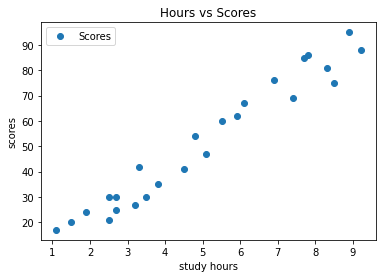

In [30]:
#plotting graph to show the distribution of scores
data.plot(x="Hours",y="Scores",style="o")
plt.title("Hours vs Scores")
plt.xlabel("study hours")
plt.ylabel("scores")
plt.show()

In [31]:
#correlation of data
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**By analysing the above plot we can clearly observe that there is a linear relation between the hours studied and the percentage of the students.**  

In [32]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [34]:
#spliting data in to training and testing sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


In [35]:
print(X_train, y_test)

[[8.5]
 [4.8]
 [3.2]
 [5.9]
 [1.9]
 [3.5]
 [8.3]
 [2.5]
 [3.8]
 [2.7]
 [2.5]
 [2.7]
 [7.7]
 [6.9]
 [4.5]
 [5.1]
 [6.1]
 [1.5]
 [5.5]
 [9.2]] [95 86 17 69 42]


In [36]:
print(X_test, y_test)

[[8.9]
 [7.8]
 [1.1]
 [7.4]
 [3.3]] [95 86 17 69 42]


In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print(" completed")

 completed


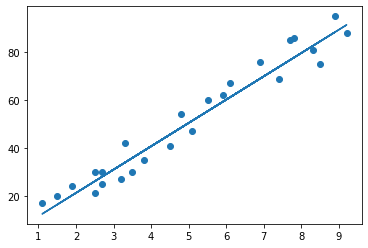

In [38]:
#regression line plotting
t_line=lr.coef_*X+lr.intercept_
#test data plotting
plt.scatter(X,y)
plt.plot(X,t_line);
plt.show()

In [39]:
#test set prediction
print("y_test:")
print(y_test)
print("X_test:")
print(X_test)

y_test:
[95 86 17 69 42]
X_test:
[[8.9]
 [7.8]
 [1.1]
 [7.4]
 [3.3]]


In [40]:
#scores prediction 
y_pred = lr.predict(X_test)
print("y_pred")
print(y_pred)

y_pred
[88.44663283 77.73202788 12.47034316 73.83580789 33.89955306]


In [41]:
#Actual vs Predict
dataframe=pd.DataFrame({"Actual":y_test,"Predict":y_pred})
dataframe

,Actual,Predict
0,95,88.446633
1,86,77.732028
2,17,12.470343
3,69,73.835808
4,42,33.899553


In [42]:
# predicted score if a student study for 9.25 hours per day
hours=9.25
new_pred=lr.predict([[hours]])
print("study hours:{}".format(hours))
print("score prediction={}".format(new_pred[0]))

study hours:9.25
score prediction=91.85582531626392


In [43]:
from sklearn import metrics

In [44]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 6.457450193167183


In [45]:
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error: 44.1652107906905
